# Red Wine Supernova

## By Sidharth Rao

### 28 December 2025

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

this is where the intro is, idk i'm just gonna go back to this later.

- analyze the data for red
- analyze the data for white
- present the results
- do the ML algorithm or smth

## Data Breakdown

#### Red Wine

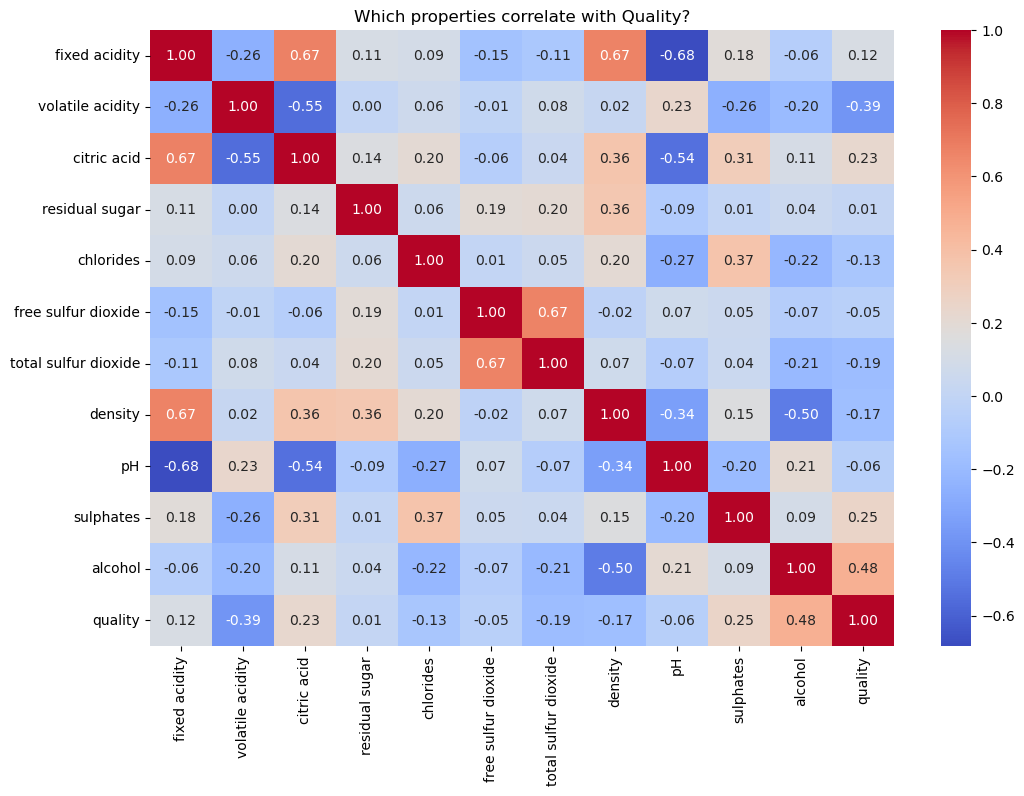

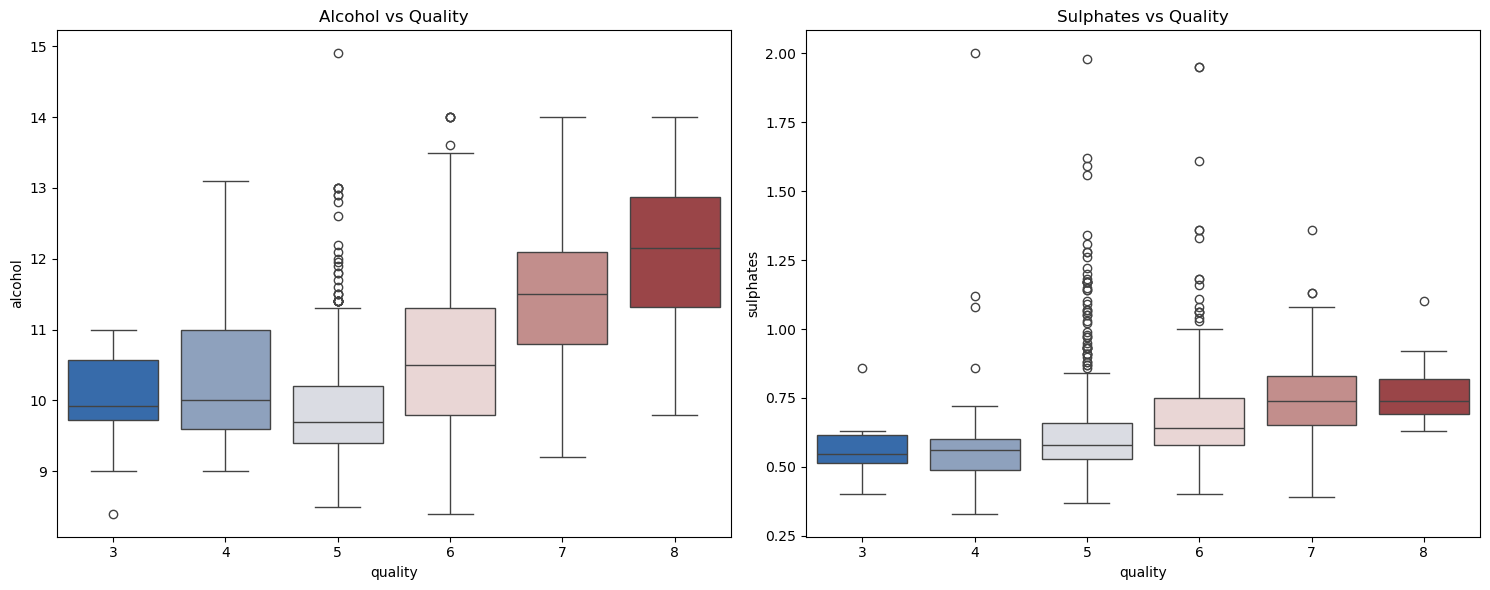

In [2]:
rw_df = pd.read_csv('winequality-red.csv', sep=';')
rw_df

plt.figure(figsize=(12, 8))
sns.heatmap(rw_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Which properties correlate with Quality?')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='quality', y='alcohol', data=rw_df, ax=ax1, 
            hue='quality', palette='vlag', legend=False)
ax1.set_title('Alcohol vs Quality')

sns.boxplot(x='quality', y='sulphates', data=rw_df, ax=ax2, 
            hue='quality', palette='vlag', legend=False)
ax2.set_title('Sulphates vs Quality')

plt.tight_layout()
plt.show()

#### White Wine

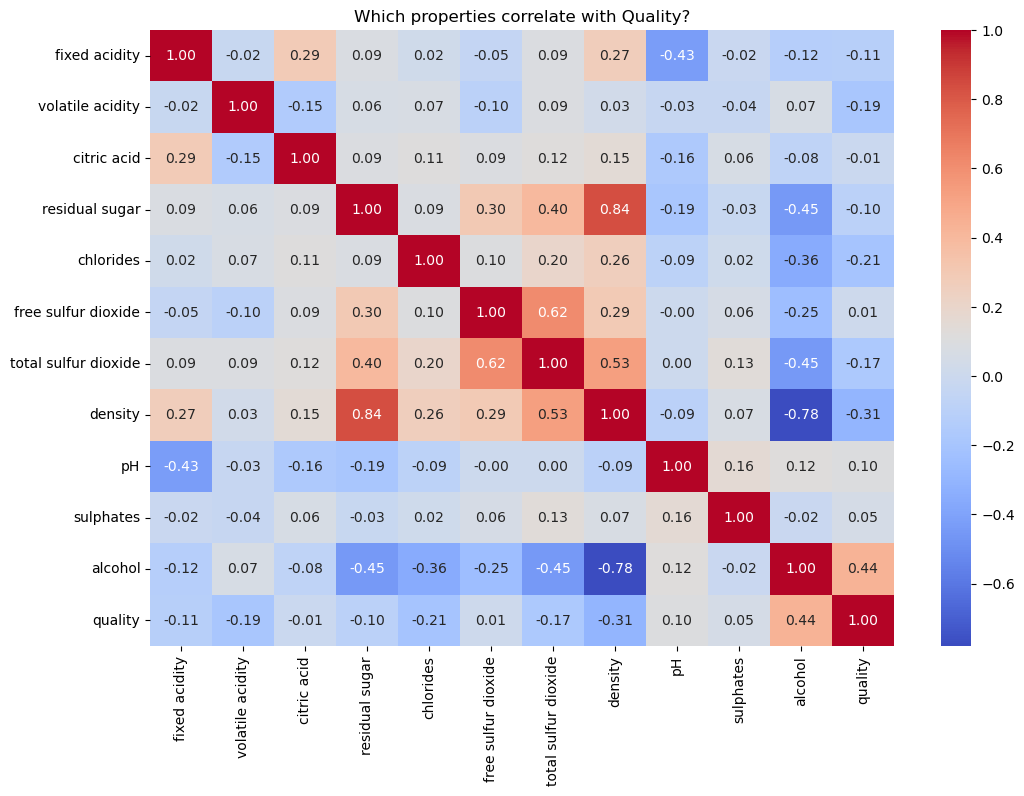

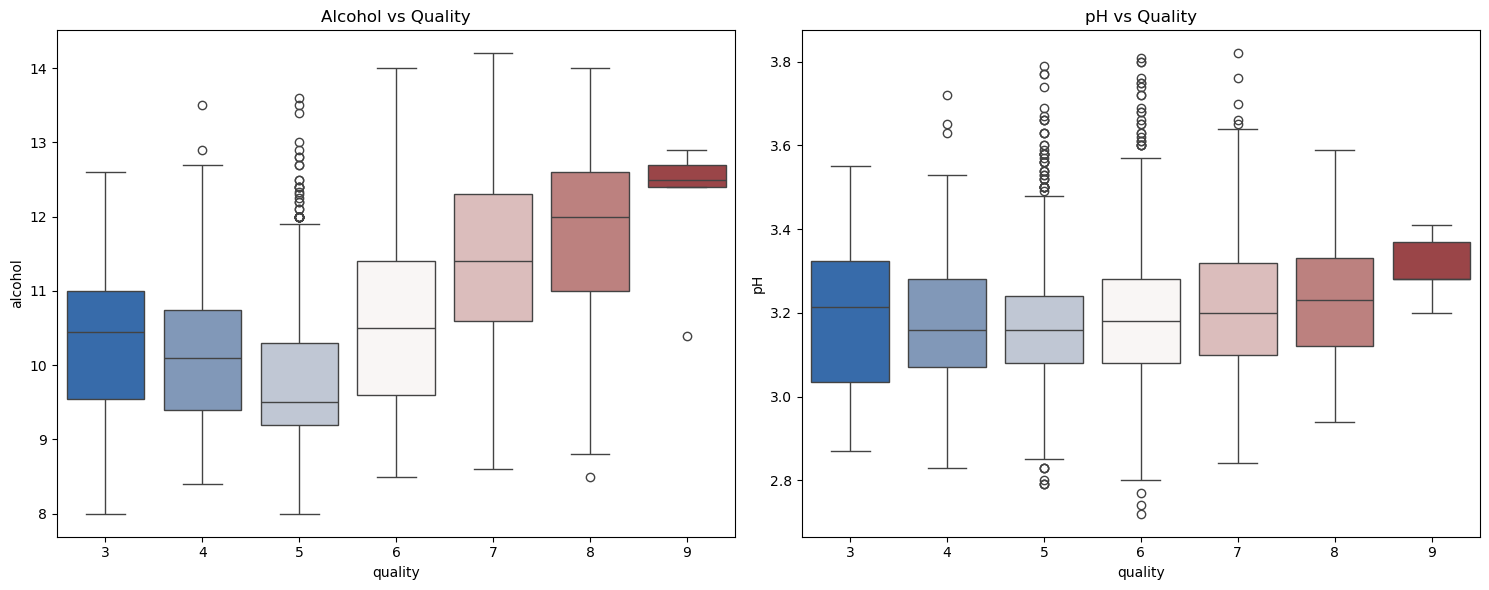

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [3]:
ww_df = pd.read_csv('winequality-white.csv', sep=';')
ww_df

plt.figure(figsize=(12, 8))
sns.heatmap(ww_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Which properties correlate with Quality?')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='quality', y='alcohol', data=ww_df, ax=ax1, 
            hue='quality', palette='vlag', legend=False)
ax1.set_title('Alcohol vs Quality')

sns.boxplot(x='quality', y='pH', data=ww_df, ax=ax2, 
            hue='quality', palette='vlag', legend=False)
ax2.set_title('pH vs Quality')

plt.tight_layout()
plt.show()
print(ww_df.head())

## Algorithm

Looking at our wine quality analysis, we see that our highest predictors for red are alcohol, sulphates, and citric acid, while our highest predictors for white are alcohol, pH, and sulphates. Both of these will factor into our algorithm for predicting wine quality for future datasets. We will primarily be using a random forest classification to make our predictions for our model.  

In [5]:
import numpy as np

def run_linear_regression(data, features, target):
    X = data[features].values
    y = data[target].values
    
    # Add the bias (intercept) column
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    # Normal Equation: (X^T * X)^-1 * X^T * y
    beta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    return beta

red_features = ['alcohol', 'sulphates', 'citric acid']
red_coeffs = run_linear_regression(rw_df, red_features, 'quality')

white_features = ['alcohol', 'pH', 'sulphates']
white_coeffs = run_linear_regression(ww_df, white_features, 'quality')
#running linear regression to predict our coefficients

print("--- Red Wine Coefficients ---")
print(f"Intercept: {red_coeffs[0]:.4f}")
for name, coef in zip(red_features, red_coeffs[1:]):
    print(f"{name}: {coef:.4f}")

print("\n--- White Wine Coefficients ---")
print(f"Intercept: {white_coeffs[0]:.4f}")
for name, coef in zip(white_features, white_coeffs[1:]):
    print(f"{name}: {coef:.4f}")

--- Red Wine Coefficients ---
Intercept: 1.4339
alcohol: 0.3384
sulphates: 0.8140
citric acid: 0.5134

--- White Wine Coefficients ---
Intercept: 1.6825
alcohol: 0.3108
pH: 0.2251
sulphates: 0.4285


In [6]:
def get_r_squared(data, features, target, beta):
    X = data[features].values
    y = data[target].values
    X_bias = np.c_[np.ones(X.shape[0]), X]
    
    # Predictions
    predictions = X_bias @ beta
    
    # Residual sum of squares (SSR) and Total sum of squares (SST)
    ssr = np.sum((y - predictions) ** 2)
    sst = np.sum((y - np.mean(y)) ** 2)
    
    return 1 - (ssr / sst)

print(f"Red Wine R-squared: {get_r_squared(rw_df, red_features, 'quality', red_coeffs):.4f}")
print(f"White Wine R-squared: {get_r_squared(ww_df, white_features, 'quality', white_coeffs):.4f}")

Red Wine R-squared: 0.2836
White Wine R-squared: 0.1949


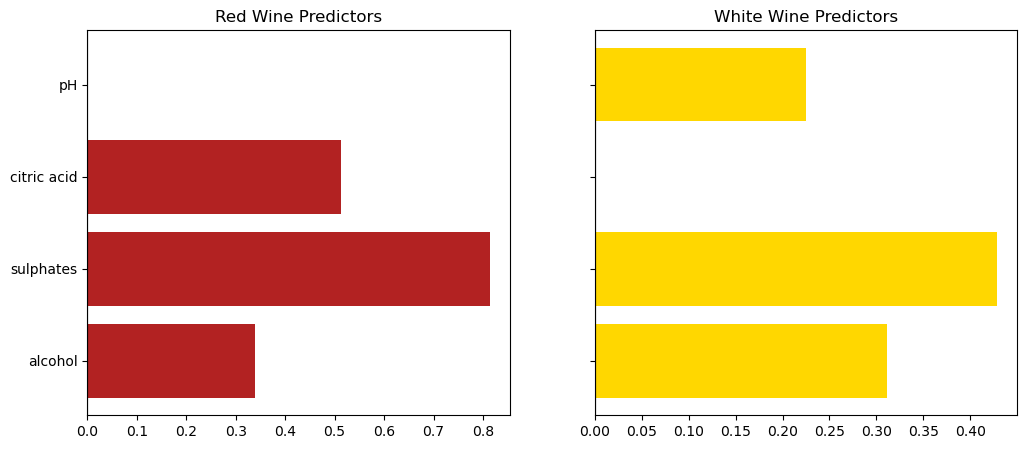

In [8]:
import matplotlib.pyplot as plt

labels_red = red_features
values_red = red_coeffs[1:]

labels_white = white_features
values_white = white_coeffs[1:]

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ax[0].barh(labels_red, values_red, color='firebrick')
ax[0].set_title('Red Wine Predictors')
ax[0].axvline(0, color='black', lw=0.8)

ax[1].barh(labels_white, values_white, color='gold')
ax[1].set_title('White Wine Predictors')
ax[1].axvline(0, color='black', lw=0.8)

plt.show()

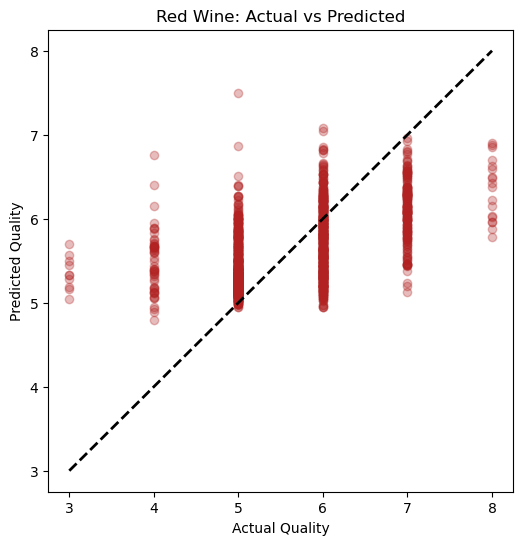

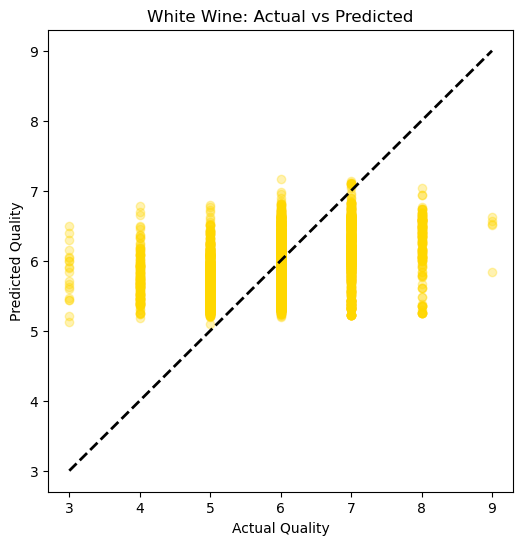

In [9]:
def plot_predictions(df, features, target, beta, title, color):
    X = df[features].values
    X_bias = np.c_[np.ones(X.shape[0]), X]
    predictions = X_bias @ beta
    actual = df[target].values
    
    plt.figure(figsize=(6, 6))
    plt.scatter(actual, predictions, alpha=0.3, color=color)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2)
    plt.xlabel('Actual Quality')
    plt.ylabel('Predicted Quality')
    plt.title(title)
    plt.show()

plot_predictions(rw_df, red_features, 'quality', red_coeffs, 'Red Wine: Actual vs Predicted', 'firebrick')
plot_predictions(ww_df, white_features, 'quality', white_coeffs, 'White Wine: Actual vs Predicted', 'gold')

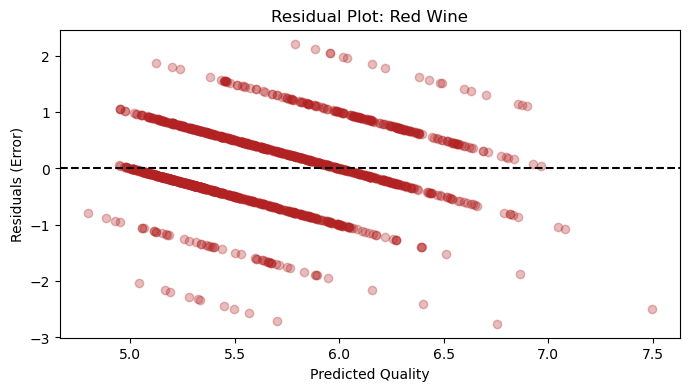

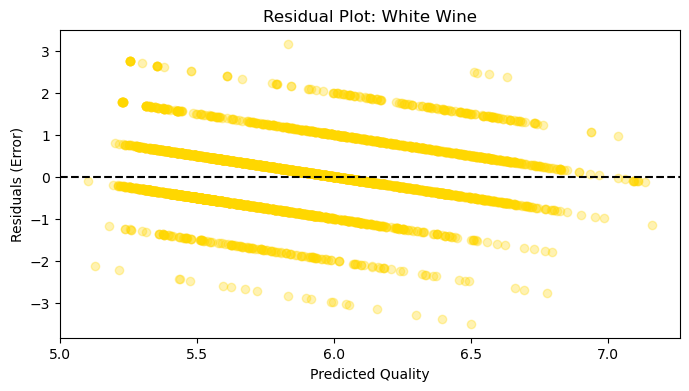

In [12]:
def plot_residuals(df, features, target, beta, title, color):
    X = df[features].values
    X_bias = np.c_[np.ones(X.shape[0]), X]
    predictions = X_bias @ beta
    residuals = df[target].values - predictions
    
    plt.figure(figsize=(8, 4))
    plt.scatter(predictions, residuals, alpha=0.3, color=color)
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel('Predicted Quality')
    plt.ylabel('Residuals (Error)')
    plt.title(f'Residual Plot: {title}')
    plt.show()

plot_residuals(rw_df, red_features, 'quality', red_coeffs, 'Red Wine', 'firebrick')
plot_residuals(ww_df, white_features, 'quality', white_coeffs, 'White Wine', 'gold')

In conclusion, this linear regression analysis confirms that key chemical markers (alcohol, sulphates, acidity) serve as significant anchors for predicting wine quality. While our models achieved an $R^2$ of 0.28 for red and 0.19 for white, these figures show that chemistry accounts for a vital portion of a wine's character, but it cannot accurately predict the quality. The remaining variance suggests that the quality of a high-scoring wine depends on other factors that were not recorded in the dataset given to me, such as the aromatics, harvest time, and personal preference of the critic. If I were to use these predictors, I could make more informed, data-driven predictions for future vintages while respecting the artistic complexity that data alone cannot fully capture.